In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [38]:
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator

In [39]:
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler
from dialogue2graph.datasets.complex_dialogues.prompts import graph_example

In [41]:
sampler = RecursiveDialogueSampler()

In [43]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [44]:
from settings import EnvSettings
env_settings = EnvSettings()

In [45]:
from langchain.chat_models import ChatOpenAI

In [62]:
generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
theme_validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)
validation_model = ChatOpenAI(model="gpt-4o-mini", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)

In [71]:
generator = LoopedGraphGenerator(generation_model,validation_model, theme_validation_model)

In [72]:
graph = generator.invoke("booking a table")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: booking a table


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ['I’d like to book a table for dinner.', 'Can you help me reserve a table at a restaurant?']}, {'source': 2, 'target': 3, 'utterances': ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']}, {'source': 3, 'target': 4, 'utterances': ['For four people.', 'A table for two, please.']}, {'source': 4, 'target': 8, 'utterances': ['Somewhere in downtown would be nice.', 'Anywhere with good Italian food.']}, {'source': 8, 'target': 9, 'utterances': ["Let's go with Italian.", 'Chinese sounds good.']}, {'source': 9, 'target': 5, 'utterances': ['Bella Italia sounds perfect.', 'I’ll go with Lotus Garden.']}, {'source': 5, 'target': 10, 'utterances': ['Yes, that’s correct.', 'Everything looks good.']}, {'source': 5, 'target': 6, 'utterances': ['Actually, can we ch

ENDS:  [12]
NODES:  [[1, 2, 3, 4, 8, 9, 5, 6, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 5, 7, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 5, 6, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 5, 7, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 5, 10, 12]]
REM:  [[1, 2, 3, 4, 8, 9, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 5, 10, 11, 12]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampled 39 dialogues


Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

Sampling dialogues...
ENDS:  [12]
NODES:  [[1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 12]]
REM:  [[1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 11, 12]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:going to return: {'edges': [{'source': 1, 'target': 2, 'utterances': ['I’d like to book a table for dinner.', 'Can you help me reserve a table at a restaurant?']}, {'source': 2, 'target': 3, 'utterances': ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']}, {'source': 3, 'target': 4, 'utterances': ['For four people.', 'A table for two, please.']}, {'source': 4, 'target': 8, 'utterances': ['Somewhere in downtown would be nice.', 'Anywhere with good Italian food.']}, {'source': 8, 'target': 9, 'utterances': ["Let's go with Italian.", 'Chinese sounds good.']}, {'source': 9, 'target': 13, 'utterances': ['Bella Italia sounds perfect.', 'I’ll go with Lotus Garden.']}, {'source': 13, 'target': 5, 'utterances': ['Yes, that works.', 'That sounds great.']}, {'source': 5, 'target': 10, 'utterances': ['Yes, that’s correct.', 'Everything looks good.']}, {'source': 5, 'target': 6, 'utterances': ['Actually, can we change the time to 9 PM?', "Let'

Graph has all the dialogues
Sampled 40 dialogues
Graph has all the dialogues


In [78]:
graph[0]['graph']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ['I’d like to book a table for dinner.',
    'Can you help me reserve a table at a restaurant?']},
  {'source': 2,
   'target': 3,
   'utterances': ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']},
  {'source': 3,
   'target': 4,
   'utterances': ['For four people.', 'A table for two, please.']},
  {'source': 4,
   'target': 8,
   'utterances': ['Somewhere in downtown would be nice.',
    'Anywhere with good Italian food.']},
  {'source': 8,
   'target': 9,
   'utterances': ["Let's go with Italian.", 'Chinese sounds good.']},
  {'source': 9,
   'target': 13,
   'utterances': ['Bella Italia sounds perfect.',
    'I’ll go with Lotus Garden.']},
  {'source': 13,
   'target': 5,
   'utterances': ['Yes, that works.', 'That sounds great.']},
  {'source': 5,
   'target': 10,
   'utterances': ['Yes, that’s correct.', 'Everything looks good.']},
  {'source': 5,
   'target': 6,
   'utterances': ['Actually, can we change the time to 9 PM?'

In [79]:
graph[0]['dialogues'][0]

{'messages': [{'text': 'Hey there! How can I help you today?',
   'participant': 'assistant'},
  {'text': 'I’d like to book a table for dinner.', 'participant': 'user'},
  {'text': 'Sure! What date and time would you like to book the table for?',
   'participant': 'assistant'},
  {'text': 'Tomorrow at 7 PM.', 'participant': 'user'},
  {'text': 'Got it. How many people will be joining?',
   'participant': 'assistant'},
  {'text': 'For four people.', 'participant': 'user'},
  {'text': 'Alright! Do you have a specific location in mind or any preferences?',
   'participant': 'assistant'},
  {'text': 'Somewhere in downtown would be nice.', 'participant': 'user'},
  {'text': 'There are a few great restaurants available. Would you like Italian, Chinese, or something else?',
   'participant': 'assistant'},
  {'text': "Let's go with Italian.", 'participant': 'user'},
  {'text': 'Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. A

In [80]:
graph_c = Graph(graph[0]['graph'])

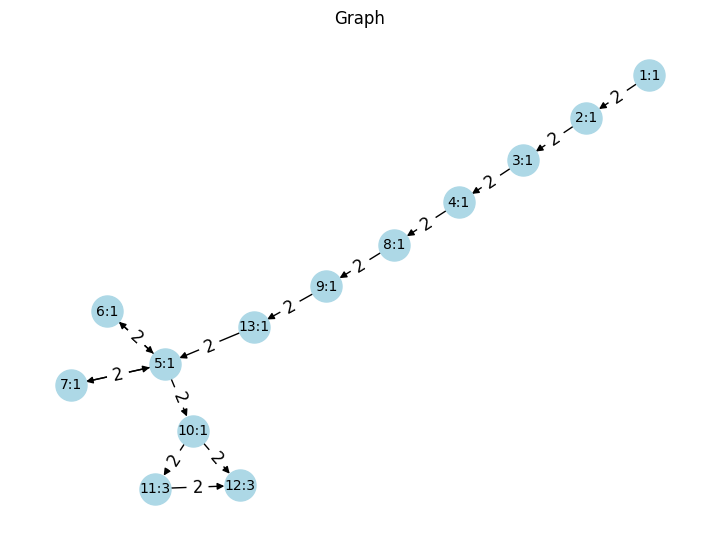

In [81]:
graph_c.visualise_short("Graph")

In [82]:
dias = sampler.invoke(graph_c,5)

ENDS:  [12]
NODES:  [[1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 11, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 12]]
REM:  [[1, 2, 3, 4, 8, 9, 13, 5, 6, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 7, 5, 10, 12], [1, 2, 3, 4, 8, 9, 13, 5, 10, 11, 12]]
Graph has all the dialogues


In [19]:
dias

[Dialogue(messages=[DialogueMessage(text='Hey there! How can I help you today?', participant='assistant'), DialogueMessage(text="I'd like to book a table for dinner.", participant='user'), DialogueMessage(text='Sure! What kind of restaurant are you looking for? Any specific cuisine or location in mind?', participant='assistant'), DialogueMessage(text="I'm looking for an Italian restaurant in downtown.", participant='user'), DialogueMessage(text='Got it. How many people will it be, and what time are you thinking?', participant='assistant'), DialogueMessage(text='Do they have anything a bit later?', participant='user'), DialogueMessage(text="That time isn't available. I can book you in an hour later, or I can check for another place. What do you prefer?", participant='assistant'), DialogueMessage(text="Let's do the later time.", participant='user'), DialogueMessage(text='Looks like they have a table available at that time. Want me to book it for you?', participant='assistant'), DialogueM

In [83]:
from three_stages_0 import ThreeStagesGraphGenerator

In [84]:
generator = ThreeStagesGraphGenerator()

In [85]:
res_graph = generator.invoke(dias)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_date_time', 'is_start': False, 'utterances': ['Sure! What date and time would you like to book the table for?']}, {'id': 3, 'label': 'ask_party_size', 'is_start': False, 'utterances': ['Got it. How many people will be joining?']}, {'id': 4, 'label': 'ask_location', 'is_start': False, 'utterances': ['Alright! Do you have a specific location in mind or any preferences?']}, {'id': 5, 'label': 'ask_cuisine', 'is_start': False, 'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']}, {'id': 6, 'label': 'suggest_restaurants', 'is_start': False, 'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']}, {'id': 7, 'label': 'confirm_restaurant', 'is_start': False, 'utterances': ['Great choice

In [17]:
graph_example

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'm looking for an Indian restaurant, preferably in the centre of town."]},
  {'source': 2,
   'target': 5,
   'utterances': ['I would prefer cheap restaurants.']},
  {'source': 5,
   'target': 7,
   'utterances': ['Sure please book a table there fore 7 people at 12:15 on saturday']},
  {'source': 1,
   'target': 5,
   'utterances': ['I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east']},
  {'source': 5,
   'target': 10,
   'utterances': ['The restaurant should serve italian food.']},
  {'source': 6,
   'target': 7,
   'utterances': ['I will have 5 people and we would like 12:15 if possible. Thanks.']},
  {'source': 7,
   'target': 9,
   'utterances': ["No that's all I needed. Thank you!",
    'Thanks for you help. I only need the restaurant reservation. Goodbye.']},
  {'source': 10,
   'target': 11,
   'utterances': ['What other restaurants in that area serve Italian 

In [86]:
res_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hey there! How can I help you today?']},
  {'id': 2,
   'label': 'ask_date_time',
   'is_start': False,
   'utterances': ['Sure! What date and time would you like to book the table for?']},
  {'id': 3,
   'label': 'ask_party_size',
   'is_start': False,
   'utterances': ['Got it. How many people will be joining?']},
  {'id': 4,
   'label': 'ask_location',
   'is_start': False,
   'utterances': ['Alright! Do you have a specific location in mind or any preferences?']},
  {'id': 5,
   'label': 'ask_cuisine',
   'is_start': False,
   'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']},
  {'id': 6,
   'label': 'suggest_restaurants',
   'is_start': False,
   'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']},
  {'id': 7,
   'label': 'confirm

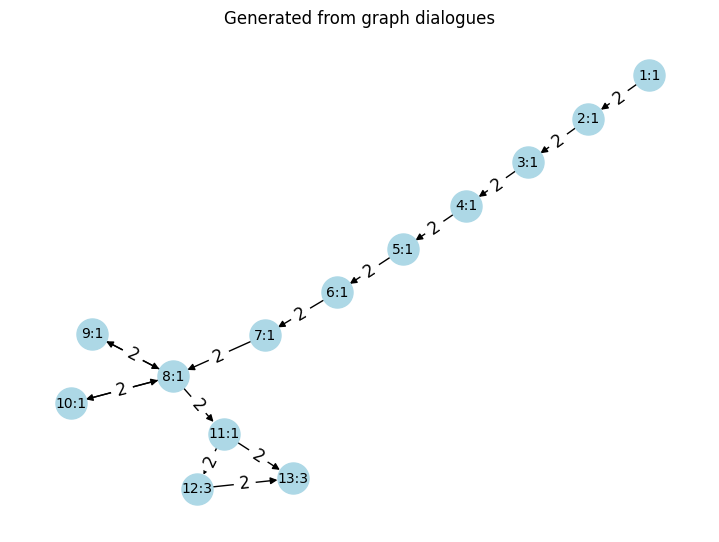

In [87]:
res_graph.visualise_short("Generated from graph dialogues")

In [88]:
from dialogue2graph.metrics.llm_metrics import compare_graphs

In [ ]:
compare_graphs(Graph(graph_c),Graph(graph_example))

{'value': False, 'description': 'Numbers of nodes do not match: 9 != 11'}

In [23]:
compare_graphs(res_graph,Graph(graph_example))

{'value': False, 'description': 'Numbers of nodes do not match: 8 != 11'}

In [91]:
compare_graphs(res_graph,graph_c)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9999997615814209, Nodes+edges similarity: 0.9678074717521667'}

In [15]:
from dialogue2graph.metrics.no_llm_metrics import dg_triplets_match

In [21]:
dg_triplets_match(Graph(graph_c), dias)

Graph has all the dialogues


{'value': True}

In [17]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [19]:
dg_triplets_match(Graph(graph_c), dias)

{'value': False,
 'description': 'Triplets missing in dialogues',
 'absent_triplets': [{'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'alright, have a great meal!'},
  {'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'no problem! what would you like to change about the reservation?',
   'edge': 'can we do 6:30 instead of 7?',
   'target': 'got it. how many people will it be, and what time are you thinking?'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'alright, have a great meal!'},
  {'source': "you're all

In [22]:
from dialogue2graph.metrics.no_llm_metrics import dialogues_are_valid_paths

In [23]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': True}

In [24]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [25]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': False,
 'invalid_transitions': [{'from_message': 'Hello! How can I help you?',
   'to_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'dialogue_id': ''},
  {'from_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'to_message': 'Try curry prince or pizza hut fen ditton',
   'dialogue_id': ''},
  {'from_message': 'Try curry prince or pizza hut fen ditton',
   'to_message': 'The restaurant should serve italian food.',
   'dialogue_id': ''},
  {'from_message': 'The restaurant should serve italian food.',
   'to_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'dialogue_id': ''},
  {'from_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'to_message': 'What other restaurants in that area serve Italian food?',
   'dialogue_id': ''}